LIBRARY YANG DIGUNAKAN

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

LOAD DATASET

In [187]:
df = pd.read_csv('heart_failure.csv')

PROCESSING DATA

In [188]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [189]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categ_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

numeric_cols, categ_cols

(Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
        'HeartDisease'],
       dtype='object'),
 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))

In [190]:
imputer = SimpleImputer(strategy='mean')
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)

df_categorical = df.select_dtypes(include=['object'])
imputer = SimpleImputer(strategy='most_frequent')
df[df_categorical.columns] = imputer.fit_transform(df_categorical)

In [191]:
# Encoding categorical variables
label_encoders = {}
for column in df_categorical.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

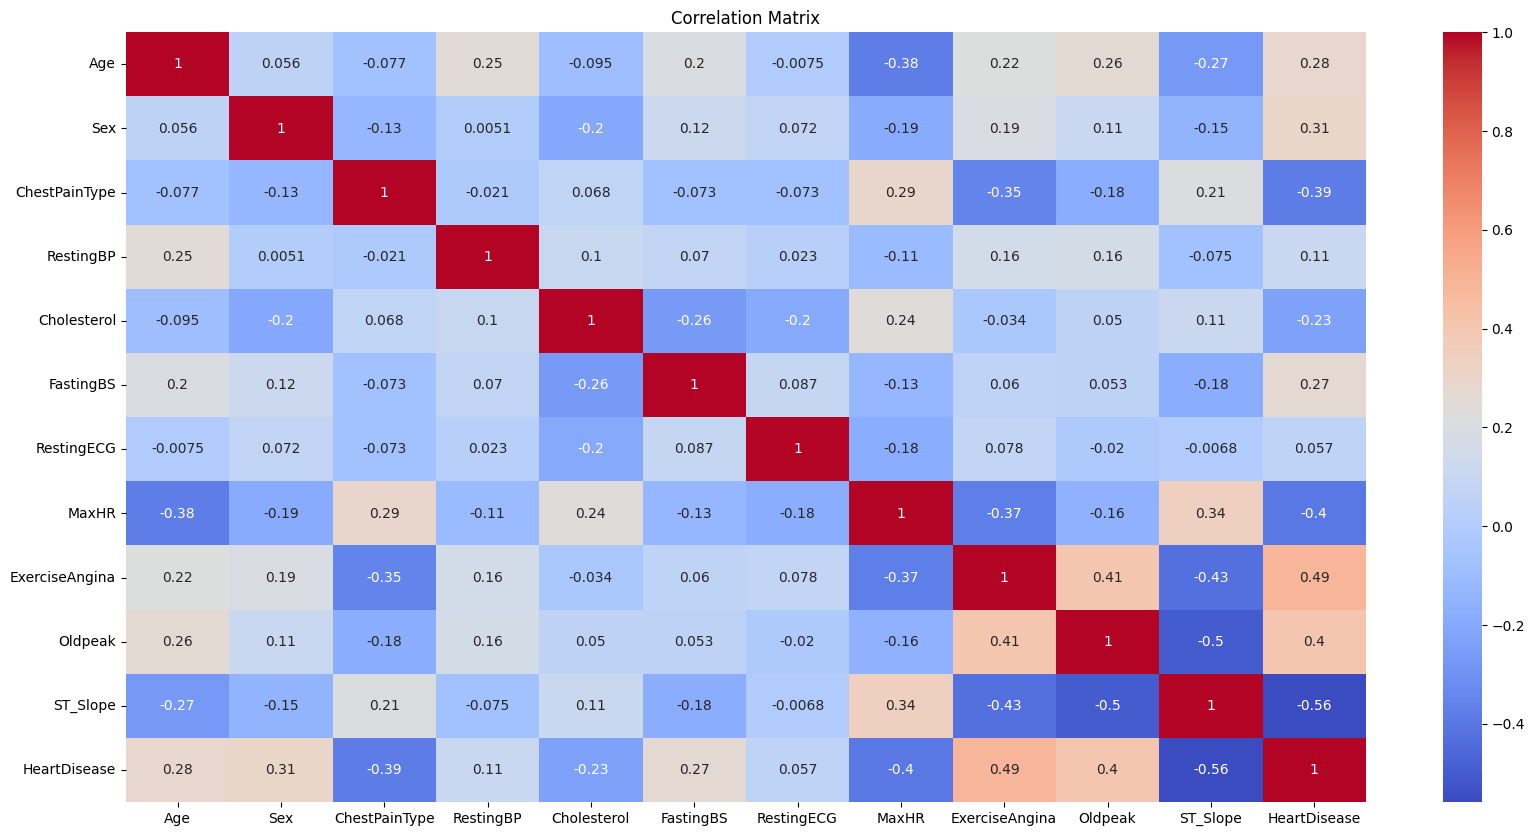

In [192]:
correlation_matrix=df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [193]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1,1,140.0,289.0,0.0,1,172.0,0,0.0,2,0.0
1,49.0,0,2,160.0,180.0,0.0,1,156.0,0,1.0,1,1.0
2,37.0,1,1,130.0,283.0,0.0,2,98.0,0,0.0,2,0.0
3,48.0,0,0,138.0,214.0,0.0,1,108.0,1,1.5,1,1.0
4,54.0,1,2,150.0,195.0,0.0,1,122.0,0,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,1.0
914,68.0,1,0,144.0,193.0,1.0,1,141.0,0,3.4,1,1.0
915,57.0,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0
916,57.0,0,1,130.0,236.0,0.0,0,174.0,0,0.0,1,1.0


In [194]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [195]:
print(X.shape, X_train.shape, X_test.shape)

(918, 11) (734, 11) (184, 11)


MODELING

In [196]:
model = GaussianNB()

In [197]:
model.fit(X_train, y_train)

GaussianNB()

EVALUASI

In [198]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [199]:
print('akurasi data training :', training_data_accuracy)

akurasi data training : 0.8610354223433242


In [200]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [201]:
print('akurasi data training :', test_data_accuracy)

akurasi data training : 0.8260869565217391


MEMBUAT MODEL PREDIKSI

In [202]:
# input_data = (-1.4331398004436657,0.5159524169453267,0.22903205711407026,0.4109088920930765,0.825070260880155,
#               -0.5513413395776455,0.017254514975740858,1.3829282169443904,-0.8235562959371365,-0.832432393131704,
#               1.0521138053843648)

input_data = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("Pasien tidak terkena penyakit jantung")
else:
    print("Pasien terkena penyakit jantung")

[1.]
Pasien terkena penyakit jantung


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [203]:
input_data = (-0.47848358571613486,-1.9381632242764861,1.275059064232063,1.4917523389166985,-0.171961047319812,
              -0.5513413395776455,0.017254514975740858,0.7541571396969302,-0.8235562959371365,0.1056635274365557,
              -0.5960781286477971)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("Pasien tidak terkena penyakit jantung")
else:
    print("Pasien terkena penyakit jantung")

[0.]
Pasien tidak terkena penyakit jantung


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


SIMPAN MODEL

In [204]:
import pickle

In [205]:
with open("heart_failure.sav", "wb") as f:
    pickle.dump(model, f)